***Vorlesung 'Syntax natürlicher Sprachen'***

--- 
# Intro: Syntaxanalyse mit formalen Grammatiken

In [1]:
import nltk

In [2]:
sent = 'I shot an elephant in my pajamas'.split()
print(sent)

['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']


---
## CFG (Kontextfreie Grammatik)

In [3]:
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP
    NP -> Det N | Det N PP | 'I'
    VP -> V NP | VP PP
    Det -> 'an' | 'my'
    N -> 'elephant' | 'pajamas'
    V -> 'shot'
    P -> 'in'
    """)


In [4]:
parser = nltk.ChartParser(grammar,trace=0)

for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
     S                                       
 ┌───┴──────────────┐                         
 │                  VP                       
 │        ┌─────────┴──────────┐              
 │        VP                   PP            
 │   ┌────┴───┐            ┌───┴───┐          
 │   │        NP           │       NP        
 │   │    ┌───┴─────┐      │   ┌───┴─────┐    
 NP  V   Det        N      P  Det        N   
 │   │    │         │      │   │         │    
 I  shot  an     elephant  in  my     pajamas

(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))
     S                                   
 ┌───┴──────────┐                         
 │              VP                       
 │   ┌──────────┴──────┐                  
 │   │                 NP                
 │   │    ┌─────┬──────┴───┐              
 │   │    │     │       

---

# Dependenzgrammatik

In [5]:
grammar = nltk.DependencyGrammar.fromstring("""
    'shot' -> 'I' | 'elephant' | 'in'
    'elephant' -> 'an' | 'in'
    'in' -> 'pajamas'
    'pajamas' -> 'my'
    """)

In [6]:
parser = nltk.ProjectiveDependencyParser(grammar)

for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(shot I (elephant an (in (pajamas my))))
    shot                 
 ┌───┴──────┐             
 │       elephant        
 │   ┌──────┴────────┐    
 │   │               in  
 │   │               │    
 │   │            pajamas
 │   │               │    
 I   an              my  

(shot I (elephant an) (in (pajamas my)))
      shot          
 ┌─────┼────────┐    
 │     │        in  
 │     │        │    
 │  elephant pajamas
 │     │        │    
 I     an       my  



---
# PCFG (Probabilistische CFG)

In [7]:
grammar1 = nltk.PCFG.fromstring("""
    S -> NP VP [1.0]
    PP -> P NP [1.0]
    NP -> Det N  [0.8] | Det N PP  [0.1] | 'I'  [0.1]
    VP -> V NP [0.8] | VP PP [0.2]
    Det -> 'an' [0.7] | 'my' [0.3]
    N -> 'elephant' [0.5] | 'pajamas' [0.5]
    V -> 'shot' [1.0]
    P -> 'in' [1.0]
    """)

In [8]:
parser = nltk.ViterbiParser(grammar1)

for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas))))) (p=0.0005376)
     S                                       
 ┌───┴──────────────┐                         
 │                  VP                       
 │        ┌─────────┴──────────┐              
 │        VP                   PP            
 │   ┌────┴───┐            ┌───┴───┐          
 │   │        NP           │       NP        
 │   │    ┌───┴─────┐      │   ┌───┴─────┐    
 NP  V   Det        N      P  Det        N   
 │   │    │         │      │   │         │    
 I  shot  an     elephant  in  my     pajamas



In [9]:
grammar2 = nltk.PCFG.fromstring("""
    S -> NP VP [1.0]
    PP -> P NP [1.0]
#andere Werte:
    NP -> Det N  [0.7] | Det N PP  [0.2] | 'I'  [0.1] 
    VP -> V NP [0.8] | VP PP [0.2]
    Det -> 'an' [0.7] | 'my' [0.3]
    N -> 'elephant' [0.5] | 'pajamas' [0.5]
    V -> 'shot' [1.0]
    P -> 'in' [1.0]
    """)

In [10]:
parser = nltk.ViterbiParser(grammar2)

for tree in parser.parse(sent):
    print(tree)
    tree.pretty_print(unicodelines=True)

(S
  (NP I)
  (VP
    (V shot)
    (NP
      (Det an)
      (N elephant)
      (PP (P in) (NP (Det my) (N pajamas)))))) (p=0.000588)
     S                                   
 ┌───┴──────────┐                         
 │              VP                       
 │   ┌──────────┴──────┐                  
 │   │                 NP                
 │   │    ┌─────┬──────┴───┐              
 │   │    │     │          PP            
 │   │    │     │      ┌───┴───┐          
 │   │    │     │      │       NP        
 │   │    │     │      │   ┌───┴─────┐    
 NP  V   Det    N      P  Det        N   
 │   │    │     │      │   │         │    
 I  shot  an elephant  in  my     pajamas



---
# *feature-based* CFG (CFG mit grammatischen Merkmalen)

In [11]:
                                                                          
## Natural Language Toolkit: german.fcfg
##
## Example of a feature-based grammar for German, illustrating
## CASE and AGR features (PER, GND, NUM) working as a bundle.
## Used in Feature-Based Grammars chapter.
## 
## Author: Michaela Atterer <atterer@ims.uni-stuttgart.de> 
##         Ewan Klein <ewan@inf.ed.ac.uk> 
##
## Plural transitive verbs productions by Jordan Boyd-Graber (ezubaric at users.sourceforge.net)


In [12]:
gramstring = r"""
% start S
#####################
# Grammar Productions
#####################
S -> NP[CASE=nom, AGR=?a] VP[AGR=?a]

NP[CASE=?c, AGR=?a] -> PRO[CASE=?c, AGR=?a]
NP[CASE=?c, AGR=?a] -> Det[CASE=?c, AGR=?a] N[CASE=?c, AGR=?a]

VP[AGR=?a] -> IV[AGR=?a]
VP[AGR=?a] -> TV[OBJCASE=?c, AGR=?a] NP[CASE=?c]

#####################
# Lexical Productions
#####################
# Singular determiners

# masc
Det[CASE=nom, AGR=[GND=masc,PER=3,NUM=sg]] -> 'der' 
Det[CASE=dat, AGR=[GND=masc,PER=3,NUM=sg]] -> 'dem'
Det[CASE=acc, AGR=[GND=masc,PER=3,NUM=sg]] -> 'den'

# fem
Det[CASE=nom, AGR=[GND=fem,PER=3,NUM=sg]] -> 'die' 
Det[CASE=dat, AGR=[GND=fem,PER=3,NUM=sg]] -> 'der'
Det[CASE=acc, AGR=[GND=fem,PER=3,NUM=sg]] -> 'die' 

# Plural determiners
Det[CASE=nom, AGR=[PER=3,NUM=pl]] -> 'die' 
Det[CASE=dat, AGR=[PER=3,NUM=pl]] -> 'den' 
Det[CASE=acc, AGR=[PER=3,NUM=pl]] -> 'die' 

# Nouns
N[AGR=[GND=masc,PER=3,NUM=sg]] -> 'Hund'
N[CASE=nom, AGR=[GND=masc,PER=3,NUM=pl]] -> 'Hunde'
N[CASE=dat, AGR=[GND=masc,PER=3,NUM=pl]] -> 'Hunden'
N[CASE=acc, AGR=[GND=masc,PER=3,NUM=pl]] -> 'Hunde'

N[AGR=[GND=fem,PER=3,NUM=sg]] -> 'Katze'
N[AGR=[GND=fem,PER=3,NUM=pl]] -> 'Katzen'

# Pronouns
PRO[CASE=nom, AGR=[PER=1,NUM=sg]] -> 'ich'
PRO[CASE=acc, AGR=[PER=1,NUM=sg]] -> 'mich'
PRO[CASE=dat, AGR=[PER=1,NUM=sg]] -> 'mir'
PRO[CASE=nom, AGR=[PER=2,NUM=sg]] -> 'du'
PRO[CASE=nom, AGR=[PER=3,NUM=sg]] -> 'er' | 'sie' | 'es'
PRO[CASE=nom, AGR=[PER=1,NUM=pl]] -> 'wir'
PRO[CASE=acc, AGR=[PER=1,NUM=pl]] -> 'uns'
PRO[CASE=dat, AGR=[PER=1,NUM=pl]] -> 'uns'
PRO[CASE=nom, AGR=[PER=2,NUM=pl]] -> 'ihr'
PRO[CASE=nom, AGR=[PER=3,NUM=pl]] -> 'sie'

# Verbs
IV[AGR=[NUM=sg,PER=1]] -> 'komme'
IV[AGR=[NUM=sg,PER=2]] -> 'kommst'
IV[AGR=[NUM=sg,PER=3]] -> 'kommt'
IV[AGR=[NUM=pl, PER=1]] -> 'kommen'
IV[AGR=[NUM=pl, PER=2]] -> 'kommt'
IV[AGR=[NUM=pl, PER=3]] -> 'kommen'

TV[OBJCASE=acc, AGR=[NUM=sg,PER=1]] -> 'sehe' | 'mag'
TV[OBJCASE=acc, AGR=[NUM=sg,PER=2]] -> 'siehst' | 'magst'
TV[OBJCASE=acc, AGR=[NUM=sg,PER=3]] -> 'sieht' | 'mag'
TV[OBJCASE=dat, AGR=[NUM=sg,PER=1]] -> 'folge' | 'helfe'
TV[OBJCASE=dat, AGR=[NUM=sg,PER=2]] -> 'folgst' | 'hilfst'
TV[OBJCASE=dat, AGR=[NUM=sg,PER=3]] -> 'folgt' | 'hilft'
TV[OBJCASE=acc, AGR=[NUM=pl,PER=1]] -> 'sehen' | 'moegen'
TV[OBJCASE=acc, AGR=[NUM=pl,PER=2]] -> 'sieht' | 'moegt'
TV[OBJCASE=acc, AGR=[NUM=pl,PER=3]] -> 'sehen' | 'moegen'
TV[OBJCASE=dat, AGR=[NUM=pl,PER=1]] -> 'folgen' | 'helfen'
TV[OBJCASE=dat, AGR=[NUM=pl,PER=2]] -> 'folgt' | 'helft'
TV[OBJCASE=dat, AGR=[NUM=pl,PER=3]] -> 'folgen' | 'helfen'
"""

In [13]:
sent = 'der Hund sieht uns'.split()
print(sent)

['der', 'Hund', 'sieht', 'uns']


In [14]:
grammar = nltk.grammar.FeatureGrammar.fromstring(gramstring)
parser = nltk.parse.FeatureChartParser(grammar)

for tree in parser.parse(sent):
    print(tree)

(S[]
  (NP[AGR=[GND='masc', NUM='sg', PER=3], CASE='nom']
    (Det[AGR=[GND='masc', NUM='sg', PER=3], CASE='nom'] der)
    (N[AGR=[GND='masc', NUM='sg', PER=3]] Hund))
  (VP[AGR=[NUM='sg', PER=3]]
    (TV[AGR=[NUM='sg', PER=3], OBJCASE='acc'] sieht)
    (NP[AGR=[NUM='pl', PER=1], CASE='acc']
      (PRO[AGR=[NUM='pl', PER=1], CASE='acc'] uns))))


---
# Partielles Parsing mit regulärer Grammatik (Chunking)

In [15]:
grammar = r"""
    NP: {<DT|PP\$>?<JJ>*<NN>}   
# chunk determiner/possessive, adjectives and noun
    {<NNP>+}               
# chunk sequences of proper nouns
    """

In [16]:
sent = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"), ("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]
print(sent)

[('Rapunzel', 'NNP'), ('let', 'VBD'), ('down', 'RP'), ('her', 'PP$'), ('long', 'JJ'), ('golden', 'JJ'), ('hair', 'NN')]


(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PP$ long/JJ golden/JJ hair/NN))


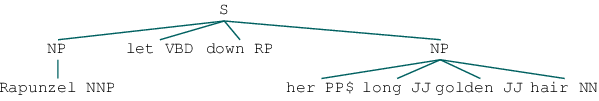

In [17]:
parser = nltk.RegexpParser(grammar)

tree = parser.parse(sent) 
print(tree)
tree